## Importing Libraries:

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import adam_v2,adamax_v2



## Display Images

In [3]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

In [4]:
xx=os.listdir(folder_path + "train/" + "happy/")
len(xx)

7164

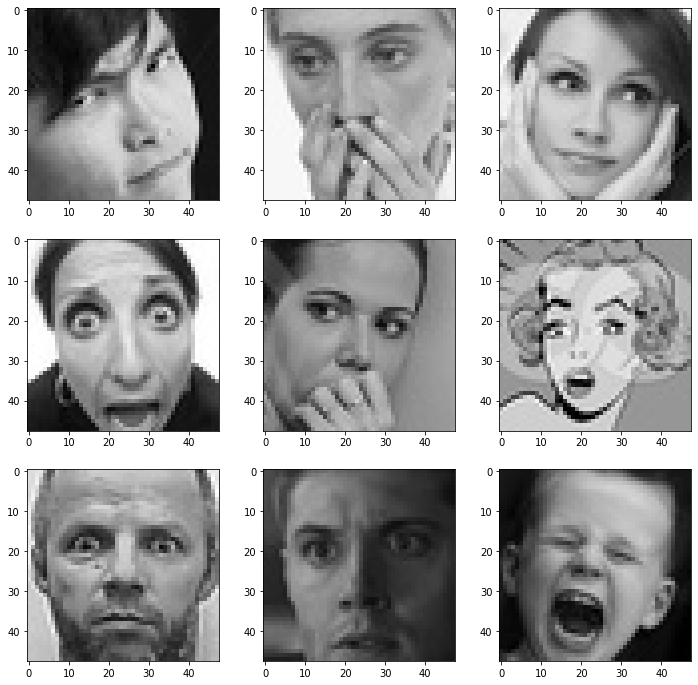

In [5]:
expression = 'fear'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

## Making training and validation data

In [6]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Model building

## Fitting the model with training and validation data

In [14]:



no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))




model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_36 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_36 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 128)      

## fitting the model for train and validation set

In [15]:
epochs = 48

from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-04-06 09:06:12.624277: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/48


2022-04-06 09:06:15.051137: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


225/225 [==============================] - 151s 637ms/step - loss: 1.8065 - accuracy: 0.3057 - val_loss: 2.4846 - val_accuracy: 0.2902
Epoch 2/48
225/225 [==============================] - 25s 113ms/step - loss: 1.4457 - accuracy: 0.4441 - val_loss: 1.5752 - val_accuracy: 0.4149
Epoch 3/48
225/225 [==============================] - 27s 121ms/step - loss: 1.2872 - accuracy: 0.5052 - val_loss: 1.3211 - val_accuracy: 0.4943
Epoch 4/48
225/225 [==============================] - 26s 114ms/step - loss: 1.2032 - accuracy: 0.5418 - val_loss: 1.1421 - val_accuracy: 0.5695
Epoch 5/48
225/225 [==============================] - 26s 116ms/step - loss: 1.1290 - accuracy: 0.5680 - val_loss: 1.1412 - val_accuracy: 0.5702
Epoch 6/48
225/225 [==============================] - 27s 120ms/step - loss: 1.0825 - accuracy: 0.5868 - val_loss: 1.2923 - val_accuracy: 0.5301
Epoch 7/48
225/225 [==============================] - 27s 122ms/step - loss: 1.0327 - accuracy: 0.6107 - val_loss: 1.1127 - val_accuracy: 0.

In [16]:
model.save_weights("./model.h5")

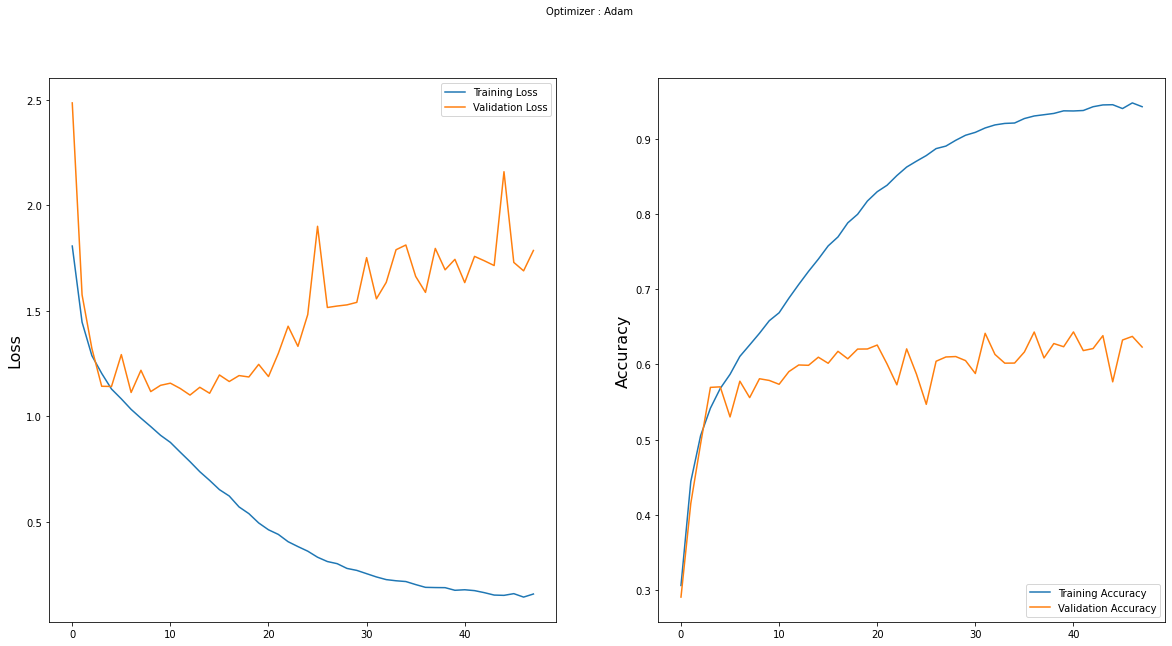

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()